### BUSINESS CONTEXT:
This case requires trainees to develop a customer segmentation to define marketing strategy. <br>
The sample dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables. Expectations from the Trainees:
<br><br>
### Buisness Problem:
 Advanced data preparation: Build an ‘enriched’ customer profile by deriving “intelligent” KPIs such as:<br>
 Monthly average purchase and cash advance amount<br>
 Purchases by type (one-off, installments)<br>
 Average amount per purchase and cash advance transaction,<br>
 Limit usage (balance to credit limit ratio),<br>
 Payments to minimum payments ratio etc.<br>
 Advanced reporting: Use the derived KPIs to gain insight on the customer profiles.<br>
 Identification of the relationships/ affinities between services.<br>
 Clustering: Apply a data reduction technique factor analysis for variable reduction technique and a clustering algorithm to reveal the behavioural segments of credit card holders<br>
 Identify cluster characterisitics of the cluster using detailed profiling.<br>
 Provide the strategic insights and implementation of strategies for given set of cluster characteristics

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm 
import scipy.stats as stats
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)

from sklearn.cluster import KMeans
# center and scale the data
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis

plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

from matplotlib.backends.backend_pdf import PdfPages

#### Import Data

In [88]:
# reading data into dataframe
data= pd.read_csv("CC_GENERAL.csv")

In [89]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [90]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [91]:
#Detailed profiling using pandas profiling
#pandas_profiling.ProfileReport(data)

In [92]:
### Exporting pandas profiling output to html file

#output = pandas_profiling.ProfileReport(data)
#output.to_file('pandas_profiling.html')

In [93]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [94]:
cust_data = data.copy()

In [95]:
## check for duplicate rows
print("Number of duplicate rows :" , len(cust_data[cust_data.duplicated(keep=False)]))

Number of duplicate rows : 0


In [96]:
#dropping CUST_ID as it is unique
cust_data.drop(['CUST_ID'], axis = 1, inplace = True)

In [97]:
## check for missing values
count_missing = cust_data.isnull().sum()
percent_missing = count_missing * 100 / len(data)
missing_value_df = pd.DataFrame({'count_missing': count_missing, 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending = False)
missing_value_df.head(10)

,count_missing,percent_missing
MINIMUM_PAYMENTS,313,3.497207
CREDIT_LIMIT,1,0.011173
BALANCE,0,0.000000
CASH_ADVANCE_FREQUENCY,0,0.000000
PRC_FULL_PAYMENT,0,0.000000
PAYMENTS,0,0.000000
PURCHASES_TRX,0,0.000000
CASH_ADVANCE_TRX,0,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0,0.000000
BALANCE_FREQUENCY,0,0.000000


In [98]:
cust_data['MINIMUM_PAYMENTS'].mean()

864.2065423050814

In [99]:
#imputing MINIMUM_PAYMENTS with zeros
cust_data['MINIMUM_PAYMENTS'] = np.where(cust_data['MINIMUM_PAYMENTS'].isna(), 
                                         (np.where(cust_data['PAYMENTS'] == 0, 0, cust_data['MINIMUM_PAYMENTS'].mean())), 
                                       cust_data['MINIMUM_PAYMENTS'])

#imputing CREDIT_LIMIT with mean
cust_data['CREDIT_LIMIT']=cust_data['CREDIT_LIMIT'].fillna((cust_data['CREDIT_LIMIT'].mean()))

In [100]:
cust_data.head(1)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.0,0.166667,0.0,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.0,12


### Exploring the varibales

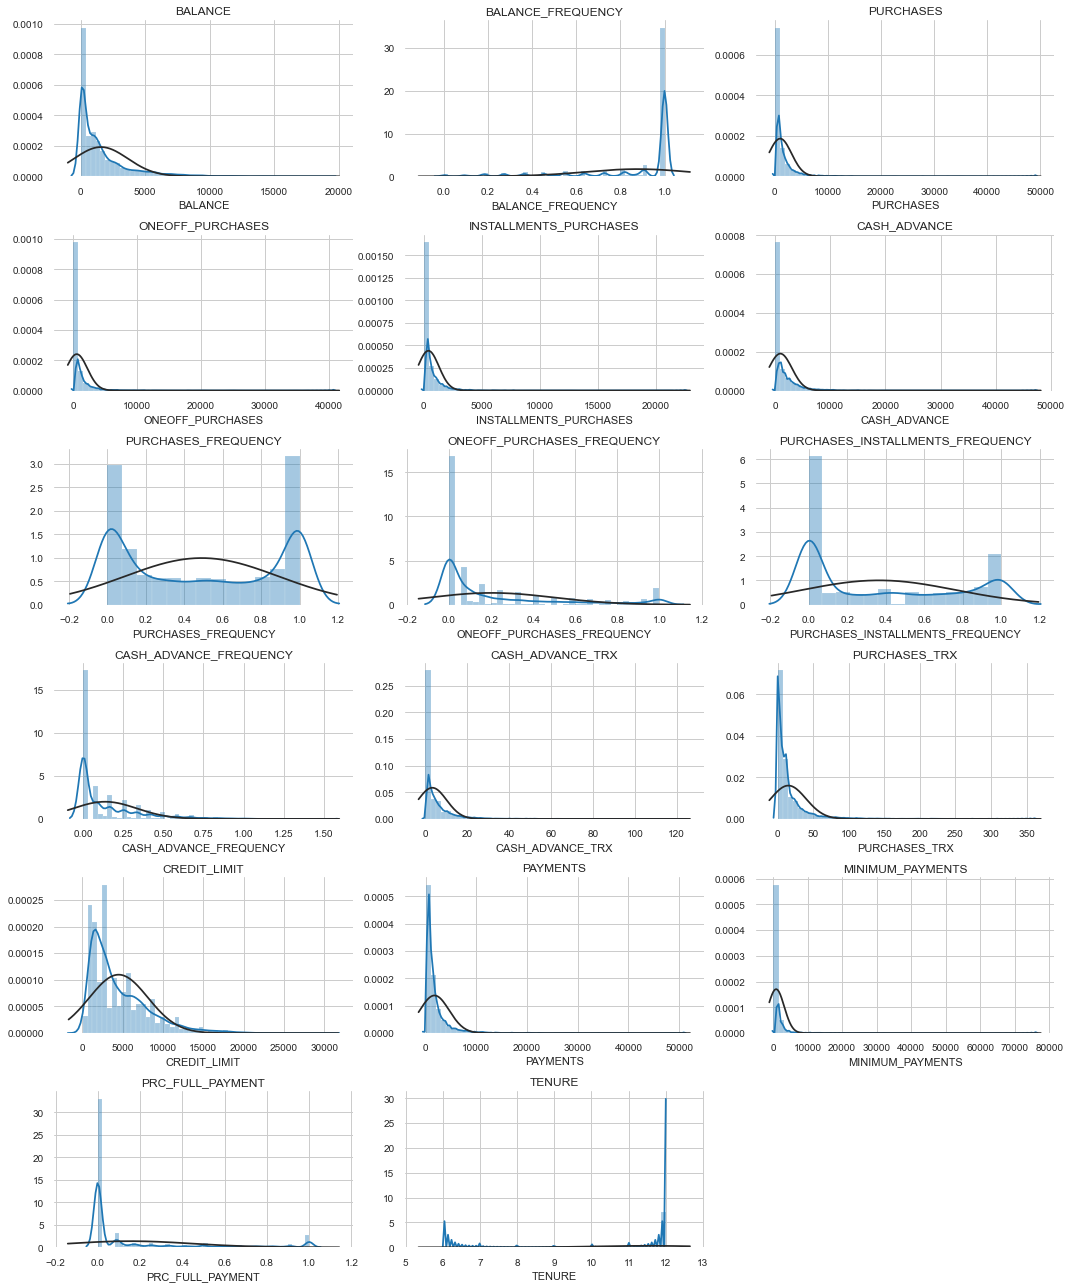

In [101]:
plt.figure(figsize=(15,18))
i = 0 
for col in cust_data.columns:
    plt.subplot(6,3,i+1)
    sns.distplot(cust_data[col],fit=norm)
    plt.title(col)
    i = i+1

plt.tight_layout()

In [102]:
data.shape

(8950, 18)

### KPIs<br>
 Monthly average purchase and cash advance amount<br>
 Purchases by type (one-off, installments)<br>
 Limit usage (balance to credit limit ratio),<br>
 Payments to minimum payments ratio etc.<br>
 Average amount per purchase and cash advance transaction,

In [103]:
cust_data['MON_AVG_PURCHASE'] = cust_data['PURCHASES'] / cust_data['TENURE']

In [104]:
cust_data['MON_AVG_CASH_ADV'] = cust_data['CASH_ADVANCE'] / cust_data['TENURE']

In [105]:
cust_data['LIMIT_USAGE'] = cust_data['BALANCE'] / cust_data['CREDIT_LIMIT']

In [106]:
cust_data['PAY_TO_MIN_PAY'] = cust_data['PAYMENTS'] / cust_data['MINIMUM_PAYMENTS']
cust_data['PAY_TO_MIN_PAY'] = cust_data['PAY_TO_MIN_PAY'].fillna(0)

In [107]:
cust_data['PURCHASE_TYPE'] = np.where(cust_data['ONEOFF_PURCHASES'] == 0, 
                                         (np.where(cust_data['INSTALLMENTS_PURCHASES']  == 0, 'None', 'Installment_Purchases')), 
                                        (np.where(cust_data['INSTALLMENTS_PURCHASES']  == 0, 'One_Of', 'Both')))

In [108]:
cust_data.loc[cust_data['PAY_TO_MIN_PAY'].isna()]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MON_AVG_PURCHASE,MON_AVG_CASH_ADV,LIMIT_USAGE,PAY_TO_MIN_PAY,PURCHASE_TYPE


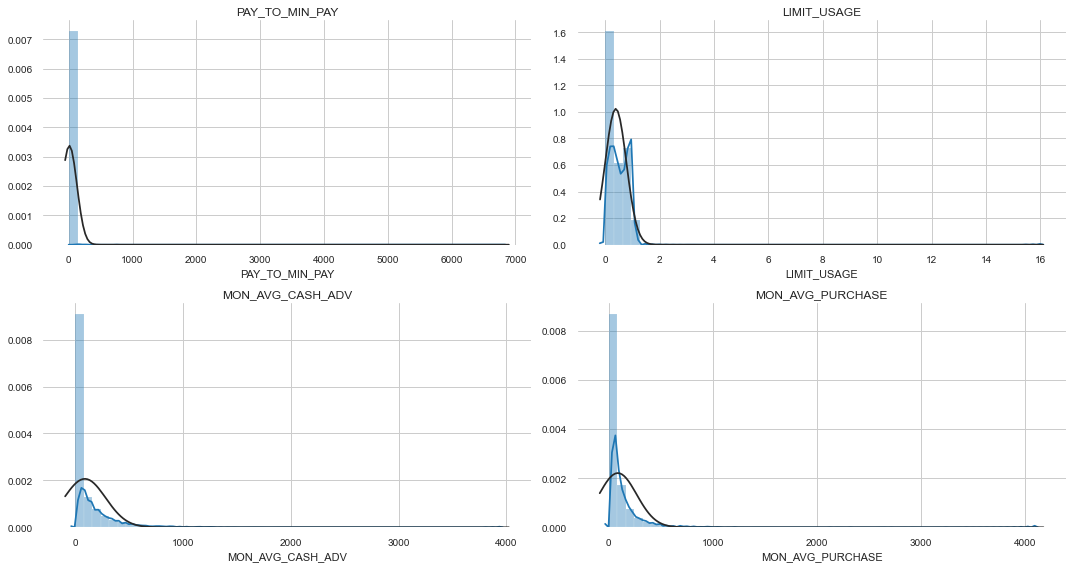

In [109]:
derived_var = cust_data[[ 'PAY_TO_MIN_PAY', 'LIMIT_USAGE', 'MON_AVG_CASH_ADV', 'MON_AVG_PURCHASE']]

plt.figure(figsize=(15,8))
i = 0 
for col in derived_var.columns:
    plt.subplot(2,2,i+1)
    sns.distplot(derived_var[col],fit=norm)
    plt.title(col)
    i = i+1

plt.tight_layout()

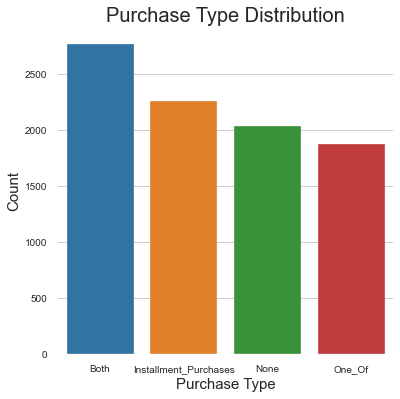

In [110]:
pur_type_count = cust_data.groupby(cust_data['PURCHASE_TYPE']).size()

fig, axs = plt.subplots(figsize = (6,6))
bar = sns.barplot(pur_type_count.index, pur_type_count.values, orient='v')
plt.title('Purchase Type Distribution',fontsize=20)
plt.xlabel('Purchase Type',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [111]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [112]:
#splitting into nurmerical and categorical variables, we have only 1 categorical variable -PURCHASE_TYPE 
cust_data_num = cust_data[cust_data.columns.difference( ['PURCHASE_TYPE'] )]
cust_data_cat = pd.DataFrame(cust_data['PURCHASE_TYPE'])
print(cust_data_num.columns)

Index(['BALANCE', 'BALANCE_FREQUENCY', 'CASH_ADVANCE',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'CREDIT_LIMIT',
       'INSTALLMENTS_PURCHASES', 'LIMIT_USAGE', 'MINIMUM_PAYMENTS',
       'MON_AVG_CASH_ADV', 'MON_AVG_PURCHASE', 'ONEOFF_PURCHASES',
       'ONEOFF_PURCHASES_FREQUENCY', 'PAYMENTS', 'PAY_TO_MIN_PAY',
       'PRC_FULL_PAYMENT', 'PURCHASES', 'PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'PURCHASES_TRX', 'TENURE'],
      dtype='object')


In [113]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=cust_data_num.apply(lambda x: var_summary(x)).T

In [114]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,1.400205e+07,1564.474828,873.385231,2081.531879,4.332775e+06,0.0,0.065101,8.814518,23.575529,128.281915,873.385231,2054.140036,4338.563657,5909.111808,9338.804814,19043.138560
BALANCE_FREQUENCY,8950.0,0.0,7.851573e+03,0.877271,1.000000,0.236904,5.612351e-02,0.0,0.090909,0.272727,0.454545,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
CASH_ADVANCE,8950.0,0.0,8.760896e+06,978.871112,0.000000,2097.163877,4.398096e+06,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1113.821139,3065.534560,4647.169122,9588.163357,47137.211760
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1.209541e+03,0.135144,0.000000,0.200121,4.004857e-02,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.833333,1.500000
CASH_ADVANCE_TRX,8950.0,0.0,2.907700e+04,3.248827,0.000000,6.824647,4.657580e+01,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,10.000000,15.000000,29.000000,123.000000
CREDIT_LIMIT,8950.0,0.0,4.022532e+07,4494.449450,3000.000000,3638.612411,1.323950e+07,50.0,500.000000,1000.000000,1200.000000,1600.000000,3000.000000,6500.000000,9500.000000,12000.000000,17000.000000,30000.000000
INSTALLMENTS_PURCHASES,8950.0,0.0,3.679055e+06,411.067645,89.000000,904.338115,8.178274e+05,0.0,0.000000,0.000000,0.000000,0.000000,89.000000,468.637500,1140.070000,1750.087500,3886.240500,22500.000000
LIMIT_USAGE,8950.0,0.0,3.480507e+03,0.388883,0.302720,0.389722,1.518831e-01,0.0,0.000029,0.002943,0.007789,0.041494,0.302720,0.717571,0.919888,0.966686,1.057059,15.909951
MINIMUM_PAYMENTS,8950.0,0.0,7.527239e+06,841.032289,299.924288,2334.766155,5.451133e+06,0.0,0.000000,43.991717,88.996826,164.653643,299.924288,819.114121,1731.689977,2719.566935,8626.691541,76406.207520
MON_AVG_CASH_ADV,8950.0,0.0,7.963530e+05,88.977984,0.000000,193.136115,3.730156e+04,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,99.085196,278.058470,425.548562,896.232349,3928.100980


In [115]:
#outliers capping with floor and ceiling with 5th and 95th percentiles

#outlier treatment
def outlier_capping(x):
    x = x.clip(x.quantile(0.05),x.quantile(0.95))
    return x

#applying outlier treatment to numerical variables
cust_data_num=cust_data_num.apply(outlier_capping)

In [116]:
# find numerical variables that are highly correlated
corr_mat = cust_data_num.corr()
corr_mat.to_csv('correlation_mat_numerical.csv')

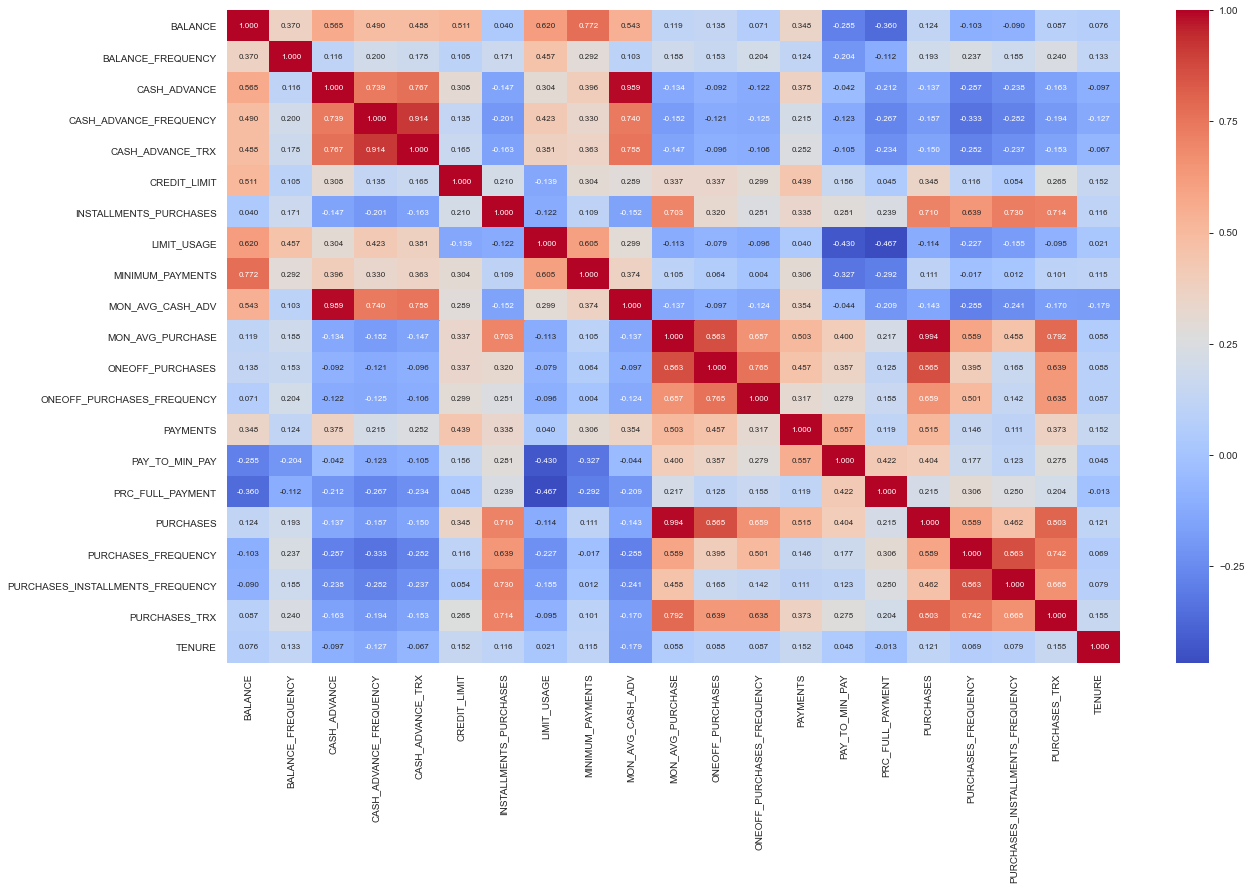

In [117]:
# visualize correlation matrix in Seaborn using a heatmap
#Checking Correlation 
corr = cust_data_num.corr()
plt.figure(figsize=(20,12))
sns.heatmap(data=corr,annot=True,cmap='coolwarm', fmt=".3f",annot_kws={'size':8})
plt.show()


In [118]:
cust_data = pd.get_dummies(cust_data, columns=['PURCHASE_TYPE'], drop_first=True, prefix='PURCHASE_TYPE')
cust_data.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MON_AVG_PURCHASE,MON_AVG_CASH_ADV,LIMIT_USAGE,PAY_TO_MIN_PAY,PURCHASE_TYPE_Installment_Purchases,PURCHASE_TYPE_None,PURCHASE_TYPE_One_Of
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,139.509787,0.000000,12,7.950000,0.000000,0.040901,1.446508,1,0,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,1072.340217,0.222222,12,0.000000,536.912124,0.457495,3.826241,0,1,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,627.284787,0.000000,12,64.430833,0.000000,0.332687,0.991682,0,0,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,0.000000,12,124.916667,17.149001,0.222223,0.000000,0,0,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,244.791237,0.000000,12,1.333333,0.000000,0.681429,2.771075,0,0,1


### Standardrizing data 
- To put data on the same scale 

In [119]:
sc=StandardScaler()

cust_data_scaled=sc.fit_transform(cust_data)

#transformating into dataframe, with existing column names
cust_data_scaled = pd.DataFrame(cust_data_scaled, columns=cust_data.columns)

In [120]:
pd.DataFrame(cust_data_scaled).head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MON_AVG_PURCHASE,MON_AVG_CASH_ADV,LIMIT_USAGE,PAY_TO_MIN_PAY,PURCHASE_TYPE_Installment_Purchases,PURCHASE_TYPE_None,PURCHASE_TYPE_One_Of
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,...,-0.300485,-0.525551,0.36068,-0.433384,-0.460727,-0.892950,-0.064226,1.720516,-0.543690,-0.514625
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,...,0.099077,0.234227,0.36068,-0.477428,2.319396,0.176063,-0.044088,-0.581221,1.839282,-0.514625
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,...,-0.091555,-0.525551,0.36068,-0.120468,-0.460727,-0.144206,-0.068075,-0.581221,-0.543690,1.943162
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,...,-0.360241,-0.525551,0.36068,0.214636,-0.371929,-0.427664,-0.076467,-0.581221,-0.543690,1.943162
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,...,-0.255389,-0.525551,0.36068,-0.470041,-0.460727,0.750693,-0.053017,-0.581221,-0.543690,1.943162


In [121]:
#mean is 0, std is 1
cust_data_scaled.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MON_AVG_PURCHASE,MON_AVG_CASH_ADV,LIMIT_USAGE,PAY_TO_MIN_PAY,PURCHASE_TYPE_Installment_Purchases,PURCHASE_TYPE_None,PURCHASE_TYPE_One_Of
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,...,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,4.195651e-16,1.209548e-14,-9.278518e-16,3.916048e-15,2.275424e-15,5.693056e-15,-3.716084e-16,2.021052e-15,2.353921e-16,5.729495e-16,...,2.189186e-16,-2.201566e-15,1.556446e-14,-3.041862e-15,-8.728152e-16,-1.453834e-17,-1.104951e-17,8.733374e-15,-4.507133e-16,-2.274580e-15
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,...,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-7.516398e-01,-3.703271e+00,-4.695519e-01,-3.569340e-01,-4.545762e-01,-4.667856e-01,-1.221758e+00,-6.786608e-01,-9.169952e-01,-6.753489e-01,...,-3.602413e-01,-5.255510e-01,-4.122768e+00,-4.774282e-01,-4.607266e-01,-9.979045e-01,-7.646693e-02,-5.812208e-01,-5.436904e-01,-5.146250e-01
25%,-6.900078e-01,4.904486e-02,-4.510006e-01,-3.569340e-01,-4.545762e-01,-4.667856e-01,-1.014125e+00,-6.786608e-01,-9.169952e-01,-6.753489e-01,...,-2.897149e-01,-5.255510e-01,3.606795e-01,-4.585950e-01,-4.607266e-01,-8.914281e-01,-6.878902e-02,-5.812208e-01,-5.436904e-01,-5.146250e-01
50%,-3.320286e-01,5.180838e-01,-3.004541e-01,-3.340396e-01,-3.561562e-01,-4.667856e-01,2.404259e-02,-3.993193e-01,-4.976286e-01,-6.753489e-01,...,-2.317741e-01,-5.255510e-01,3.606795e-01,-3.004925e-01,-4.607266e-01,-2.211010e-01,-5.939640e-02,-5.812208e-01,-5.436904e-01,-5.146250e-01
75%,2.352559e-01,5.180838e-01,5.004652e-02,-9.056763e-03,6.366321e-02,6.435242e-02,1.062211e+00,3.269728e-01,9.701506e-01,4.351492e-01,...,-9.388260e-03,-3.712234e-02,3.606795e-01,6.123679e-02,5.233499e-02,8.434382e-01,-2.527617e-02,1.720516e+00,-5.436904e-01,-5.146250e-01
max,8.397489e+00,5.180838e-01,2.248351e+01,2.420107e+01,2.442689e+01,2.201112e+01,1.269843e+00,2.673451e+00,1.599199e+00,6.820521e+00,...,3.236701e+01,2.893453e+00,3.606795e-01,2.216335e+01,1.987892e+01,3.982824e+01,5.781057e+01,1.720516e+00,1.839282e+00,1.943162e+00


### Applyting PCA


In [122]:
pc = PCA(n_components=24)

In [123]:
pc.fit(cust_data_scaled)

PCA(copy=True, iterated_power='auto', n_components=24, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [124]:
#Eigen value
pc.explained_variance_ 

array([5.71435060e+00, 4.59441822e+00, 2.17141949e+00, 1.76837194e+00,
       1.38943608e+00, 1.14967791e+00, 1.03602728e+00, 9.87492027e-01,
       8.28852372e-01, 7.48198917e-01, 6.71395270e-01, 5.81566751e-01,
       5.57264566e-01, 4.28187706e-01, 3.07414043e-01, 2.65081121e-01,
       2.43687355e-01, 1.80044931e-01, 1.72401235e-01, 1.50686504e-01,
       3.60880966e-02, 1.62212741e-02, 4.38654434e-03, 1.16245774e-05])

In [125]:
#Eigen values sum shoule be equal to 24
sum(pc.explained_variance_)

24.002681863895404

In [126]:
np.cumsum(pc.explained_variance_ratio_) 

array([0.23807134, 0.42948404, 0.51994974, 0.59362368, 0.65151038,
       0.69940827, 0.74257125, 0.78371216, 0.81824381, 0.84941528,
       0.87738696, 0.9016162 , 0.92483296, 0.94267213, 0.95547961,
       0.96652343, 0.97667593, 0.98417696, 0.99135955, 0.99763745,
       0.99914095, 0.99981676, 0.99999952, 1.        ])

Total variance should be >75% and individual eigen value should be >0.8. <br>
##### Based on the above criteria, you can finalize number of components = 9

In [127]:
pc = PCA(n_components=9)

pc = pc.fit(cust_data_scaled)

In [128]:
pc.explained_variance_

array([5.7143506 , 4.59441822, 2.17141949, 1.76837194, 1.38943608,
       1.14967791, 1.03602724, 0.98749139, 0.82885236])

In [129]:
#Dimension Reduction
reduced_cr=pc.transform(cust_data_scaled)  # the out put is Factors (F1, F2, ...F9)
dimensions = pd.DataFrame(reduced_cr)
dimensions.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']

In [130]:
dimensions.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-1.198345,-2.020085,-0.321478,-0.281645,0.607118,0.553216,0.257756,-0.274551,0.916228
1,-2.137639,3.165655,-0.269814,-1.342496,0.716598,0.565455,-1.058569,-0.351470,-0.445421
2,0.907313,-0.316630,2.099312,1.189595,-2.599154,0.490044,-0.272470,0.267970,-0.737366
3,-0.585403,-0.344516,2.417138,-0.193535,-0.374675,1.290501,0.483979,-0.269051,0.233344
4,-1.502581,-0.856858,1.724652,1.277285,-0.626467,0.270789,0.533851,0.037559,1.010241
5,0.439154,-0.861124,-1.772943,1.677314,0.807231,0.498516,0.998907,-0.103024,0.942318
6,7.020652,0.581718,1.583906,-1.442235,0.043922,-0.506404,-1.382850,-0.156815,-0.804455
7,0.406568,-1.484713,-2.311980,1.299868,-0.119543,0.159993,0.401841,0.083052,0.729949
8,-0.125016,-0.763149,0.514697,0.381025,0.130779,0.469064,-0.737160,-0.113444,-0.423034
9,-0.220956,-0.755814,2.671949,-0.850594,-0.513876,1.809116,0.161836,-0.269052,-0.246801


In [131]:
#variable reduction
Loadings =  pd.DataFrame((pc.components_.T * np.sqrt(pc.explained_variance_)).T,columns=cust_data.columns).T
Loadings.to_csv('Loadings.csv')

In [132]:
cust_data_scaled.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MON_AVG_PURCHASE,MON_AVG_CASH_ADV,LIMIT_USAGE,PAY_TO_MIN_PAY,PURCHASE_TYPE_Installment_Purchases,PURCHASE_TYPE_None,PURCHASE_TYPE_One_Of
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,...,-0.300485,-0.525551,0.36068,-0.433384,-0.460727,-0.892950,-0.064226,1.720516,-0.543690,-0.514625
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,...,0.099077,0.234227,0.36068,-0.477428,2.319396,0.176063,-0.044088,-0.581221,1.839282,-0.514625
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,...,-0.091555,-0.525551,0.36068,-0.120468,-0.460727,-0.144206,-0.068075,-0.581221,-0.543690,1.943162
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,...,-0.360241,-0.525551,0.36068,0.214636,-0.371929,-0.427664,-0.076467,-0.581221,-0.543690,1.943162
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,...,-0.255389,-0.525551,0.36068,-0.470041,-0.460727,0.750693,-0.053017,-0.581221,-0.543690,1.943162


### K-Means Clustering

In [134]:
selected_vars = [
'INSTALLMENTS_PURCHASES',
'PURCHASES_TRX',
'MON_AVG_PURCHASE',
'BALANCE',
'MON_AVG_CASH_ADV',
'CASH_ADVANCE_TRX',
'PURCHASES_INSTALLMENTS_FREQUENCY',
'PURCHASE_TYPE_One_Of',
'BALANCE_FREQUENCY',
'PURCHASE_TYPE_None'

]


In [135]:
#Build the segmentation
final_input_segmentation = cust_data_scaled[selected_vars]

In [149]:
km_3 = KMeans(n_clusters=3, random_state=123)
km_3.fit(final_input_segmentation)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [137]:
km_3.cluster_centers_

array([[ 0.3725619 ,  0.38137824,  0.24598661, -0.17319046, -0.28825121,
        -0.26932781,  0.74127485, -0.51207754,  0.04064822, -0.54369045],
       [-0.4201549 , -0.54470615, -0.43394967,  0.44092377,  0.69206262,
         0.64149189, -0.82577714, -0.49410744,  0.06100319,  1.59428386],
       [-0.45457623, -0.32433376, -0.10755133, -0.09084957, -0.09978957,
        -0.08691795, -0.91699519,  1.94316249, -0.18104339, -0.54369045]])

In [138]:
km_4 = KMeans(n_clusters=4, random_state=123).fit(final_input_segmentation)
km_5 = KMeans(n_clusters=5, random_state=123).fit(final_input_segmentation)
km_6 = KMeans(n_clusters=6, random_state=123).fit(final_input_segmentation)
km_7 = KMeans(n_clusters=7, random_state=123).fit(final_input_segmentation)
km_8 = KMeans(n_clusters=8, random_state=123).fit(final_input_segmentation)

In [139]:
# Conactenating labels found through Kmeans with data 
cust_data['cluster_3'] = km_3.labels_
cust_data['cluster_4'] = km_4.labels_
cust_data['cluster_5'] = km_5.labels_
cust_data['cluster_6'] = km_6.labels_
cust_data['cluster_7'] = km_7.labels_
cust_data['cluster_8'] = km_8.labels_

In [140]:
cust_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAY_TO_MIN_PAY,PURCHASE_TYPE_Installment_Purchases,PURCHASE_TYPE_None,PURCHASE_TYPE_One_Of,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,1.446508,1,0,0,0,1,1,1,0,4
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,3.826241,0,1,0,1,0,3,3,1,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.991682,0,0,1,2,3,0,0,3,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,0,0,1,2,3,0,0,3,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,2.771075,0,0,1,2,3,0,0,3,2


In [141]:
#checking segment distribution
clusters = ['cluster_3', 'cluster_4', 'cluster_5', 'cluster_6', 'cluster_7', 'cluster_8']
for i in clusters:
    print(round((cust_data.groupby(i).size() / len(cust_data)) * 100, 2))

cluster_3
0    53.90
1    25.43
2    20.67
dtype: float64
cluster_4
0    25.25
1    49.05
2     5.05
3    20.65
dtype: float64
cluster_5
0    19.65
1    48.84
2     6.80
3    20.49
4     4.21
dtype: float64
cluster_6
0    16.83
1    42.64
2     5.83
3    19.03
4    11.89
5     3.79
dtype: float64
cluster_7
0    38.36
1    18.97
2     5.71
3    16.74
4     0.66
5     8.25
6    11.32
dtype: float64
cluster_8
0    23.28
1    18.99
2    16.76
3     5.53
4    18.49
5     0.60
6     5.43
7    10.91
dtype: float64


#### calculate the silhouette score for each segment 

In [145]:
#compare SC scores for different cluster values
km_labels = [km_3, km_4, km_5, km_6, km_7, km_8]
sc_df = pd.DataFrame(columns = ['Cluster', 'SC_score'])

index = 0
for i in km_labels:
    sc_df.loc[index] = [i.n_clusters, silhouette_score(final_input_segmentation, i.labels_)]
    index = index + 1
    
#sc_df = sc_df.sort_values(by='SC_score',ascending=False)
sc_df

,Cluster,SC_score
0,3.0,0.343252
1,4.0,0.362151
2,5.0,0.388516
3,6.0,0.396495
4,7.0,0.383790
5,8.0,0.303279


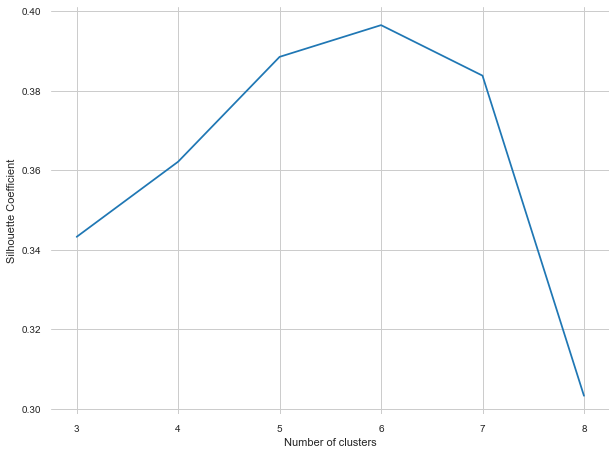

In [146]:
# plot the results
plt.plot(sc_df.Cluster, sc_df.SC_score)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

##### Note
Best SC score is for a 6 segment solution followed by 5 segment.<br>
We can look at a 5 or 6 segment solution. Segment distribution for 5 clusters looks a bit skewed as one of the segment is at 48%.<br>
Segment distribution for 6 cluster solution is better as lowest is at 4%, highest at 42%<br>
The actual number of clusters chosen can be finally based on business context and profilling.

In [148]:
#centroid for 6 segment
km_6.cluster_centers_

array([[-0.45457623, -0.292492  , -0.07955708, -0.06398905, -0.15310692,
        -0.1285092 , -0.91699519,  1.94316249,  0.22031446, -0.54369045],
       [ 0.21375122,  0.20736922,  0.06877631, -0.22215696, -0.30540953,
        -0.28737026,  0.78384224, -0.514625  ,  0.35801274, -0.54369045],
       [-0.15251961, -0.15996437, -0.09439117,  1.92102699,  2.69321316,
         2.5141612 , -0.25601349, -0.10499375,  0.37965663,  0.29628448],
       [-0.45437131, -0.59146514, -0.47718624,  0.19812643,  0.25159381,
         0.27003291, -0.91587587, -0.514625  ,  0.24634493,  1.8322855 ],
       [-0.29194137, -0.40958281, -0.32735222, -0.71826382, -0.35379899,
        -0.39398767, -0.34131496,  0.12061143, -2.33015659, -0.18534874],
       [ 3.04705703,  3.46824383,  3.14922029,  1.0860348 , -0.18247085,
        -0.18559154,  1.31677735, -0.47112434,  0.48262604, -0.54369045]])

## Profiling

In [337]:
size=pd.concat([pd.Series(cust_data.cluster_3.size), pd.Series.sort_index(cust_data.cluster_3.value_counts()), pd.Series.sort_index(cust_data.cluster_4.value_counts()),
           pd.Series.sort_index(cust_data.cluster_5.value_counts()), pd.Series.sort_index(cust_data.cluster_6.value_counts()),
           pd.Series.sort_index(cust_data.cluster_7.value_counts()), pd.Series.sort_index(cust_data.cluster_8.value_counts())])

In [338]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/cust_data.cluster_3.size, columns=['Seg_Pct'])
Seg_size.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950,4824,2276,1850,2260,4390,452,1848,1759,4371,...,738,1013,2084,1700,1500,495,1655,54,486,976


In [339]:
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_Pct,1.0,0.538994,0.254302,0.206704,0.252514,0.490503,0.050503,0.20648,0.196536,0.48838,...,0.082458,0.113184,0.232849,0.189944,0.167598,0.055307,0.184916,0.006034,0.054302,0.10905


In [340]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([cust_data.apply(lambda x: x.mean()).T, cust_data.groupby('cluster_3').apply(lambda x: x.mean()).T, cust_data.groupby('cluster_4').apply(lambda x: x.mean()).T,
          cust_data.groupby('cluster_5').apply(lambda x: x.mean()).T, cust_data.groupby('cluster_6').apply(lambda x: x.mean()).T,
          cust_data.groupby('cluster_7').apply(lambda x: x.mean()).T, cust_data.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)


In [341]:
Profling_output

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
BALANCE,1564.474828,1203.993494,2482.220436,1375.379123,2478.624376,951.007019,3756.902260,1367.596310,1170.329921,909.758914,...,2541.860855,69.655995,813.676598,1970.206792,1434.025835,5665.080987,1284.487723,5438.232087,3117.452217,68.820489
BALANCE_FREQUENCY,0.877271,0.886900,0.891722,0.834383,0.891442,0.876619,0.988822,0.834204,0.827508,0.876026,...,0.985321,0.308410,0.968494,0.935193,0.931125,0.966907,0.934054,0.982997,0.987638,0.296274
PURCHASES,1003.204834,1531.888425,87.147996,751.624141,70.627726,996.364729,6817.220752,737.900249,744.587300,1007.398733,...,4148.909593,326.321728,1202.067428,0.000000,781.433007,740.813616,752.368079,17780.663148,4971.930905,320.736773
ONEOFF_PURCHASES,592.437371,784.434063,56.050633,751.693681,40.279593,461.307333,4031.803296,737.969865,744.660438,465.363498,...,2365.918577,184.545271,440.387462,0.000000,781.518773,476.225212,478.034211,10457.032037,2968.920350,182.188238
INSTALLMENTS_PURCHASES,411.067645,747.970744,31.126779,0.000000,30.377757,535.488155,2786.744889,0.000000,0.000000,542.467865,...,1783.804024,142.069447,762.122999,0.000000,0.000000,264.723657,274.739275,7323.631111,2004.245123,138.852633
CASH_ADVANCE,978.871112,376.932699,2424.050254,770.505265,2395.295853,322.929942,1123.179470,769.582393,530.867424,275.923911,...,535.474275,235.440455,228.081897,1502.335814,663.176037,6796.322385,475.954666,737.445693,641.342686,239.179998
PURCHASES_FREQUENCY,0.490351,0.762514,0.051466,0.320612,0.049567,0.739848,0.965451,0.320508,0.322629,0.737882,...,0.966353,0.285797,0.943292,0.000196,0.354205,0.364674,0.554417,0.945679,0.963093,0.280711
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.243165,0.020323,0.320386,0.018896,0.201620,0.646679,0.320282,0.322393,0.201998,...,0.578882,0.061524,0.202942,0.000000,0.353927,0.172816,0.221614,0.678255,0.639791,0.059728
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.659039,0.036252,0.000000,0.035005,0.633842,0.885040,0.000000,0.000000,0.633079,...,0.876190,0.216701,0.884189,0.000196,0.000000,0.257020,0.371600,0.866526,0.867661,0.213147
CASH_ADVANCE_FREQUENCY,0.135144,0.063081,0.300273,0.119899,0.298963,0.059551,0.112594,0.119894,0.098368,0.053611,...,0.075245,0.027995,0.045927,0.254223,0.120119,0.571588,0.088335,0.058642,0.085696,0.028202


In [342]:
Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)

In [343]:
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [344]:
Profling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,8950.000000,4824.000000,2276.000000,1850.000000,2260.000000,4390.000000,452.000000,1848.000000,1759.000000,4371.000000,...,738.000000,1013.000000,2084.000000,1700.000000,1500.000000,495.000000,1655.000000,54.000000,486.000000,976.000000
Seg_Pct,1.000000,0.538994,0.254302,0.206704,0.252514,0.490503,0.050503,0.206480,0.196536,0.488380,...,0.082458,0.113184,0.232849,0.189944,0.167598,0.055307,0.184916,0.006034,0.054302,0.109050
BALANCE,1564.474828,1203.993494,2482.220436,1375.379123,2478.624376,951.007019,3756.902260,1367.596310,1170.329921,909.758914,...,2541.860855,69.655995,813.676598,1970.206792,1434.025835,5665.080987,1284.487723,5438.232087,3117.452217,68.820489
BALANCE_FREQUENCY,0.877271,0.886900,0.891722,0.834383,0.891442,0.876619,0.988822,0.834204,0.827508,0.876026,...,0.985321,0.308410,0.968494,0.935193,0.931125,0.966907,0.934054,0.982997,0.987638,0.296274
PURCHASES,1003.204834,1531.888425,87.147996,751.624141,70.627726,996.364729,6817.220752,737.900249,744.587300,1007.398733,...,4148.909593,326.321728,1202.067428,0.000000,781.433007,740.813616,752.368079,17780.663148,4971.930905,320.736773
ONEOFF_PURCHASES,592.437371,784.434063,56.050633,751.693681,40.279593,461.307333,4031.803296,737.969865,744.660438,465.363498,...,2365.918577,184.545271,440.387462,0.000000,781.518773,476.225212,478.034211,10457.032037,2968.920350,182.188238
INSTALLMENTS_PURCHASES,411.067645,747.970744,31.126779,0.000000,30.377757,535.488155,2786.744889,0.000000,0.000000,542.467865,...,1783.804024,142.069447,762.122999,0.000000,0.000000,264.723657,274.739275,7323.631111,2004.245123,138.852633
CASH_ADVANCE,978.871112,376.932699,2424.050254,770.505265,2395.295853,322.929942,1123.179470,769.582393,530.867424,275.923911,...,535.474275,235.440455,228.081897,1502.335814,663.176037,6796.322385,475.954666,737.445693,641.342686,239.179998
PURCHASES_FREQUENCY,0.490351,0.762514,0.051466,0.320612,0.049567,0.739848,0.965451,0.320508,0.322629,0.737882,...,0.966353,0.285797,0.943292,0.000196,0.354205,0.364674,0.554417,0.945679,0.963093,0.280711
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.243165,0.020323,0.320386,0.018896,0.201620,0.646679,0.320282,0.322393,0.201998,...,0.578882,0.061524,0.202942,0.000000,0.353927,0.172816,0.221614,0.678255,0.639791,0.059728


In [345]:
Profling_output_final.to_csv('Profiling_output.csv')

In [346]:
profile_index = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'MON_AVG_PURCHASE',
       'MON_AVG_CASH_ADV', 'LIMIT_USAGE', 'PAY_TO_MIN_PAY',
       'PURCHASE_TYPE_Installment_Purchases', 'PURCHASE_TYPE_None',
       'PURCHASE_TYPE_One_Of']

km6_series_list = []
for i in profile_index:
    km6_series = Profling_output_final.loc[i]
    km6_series = km6_series[13:19]
    km6_series_list.append(km6_series)
    
len(km6_series_list)

24

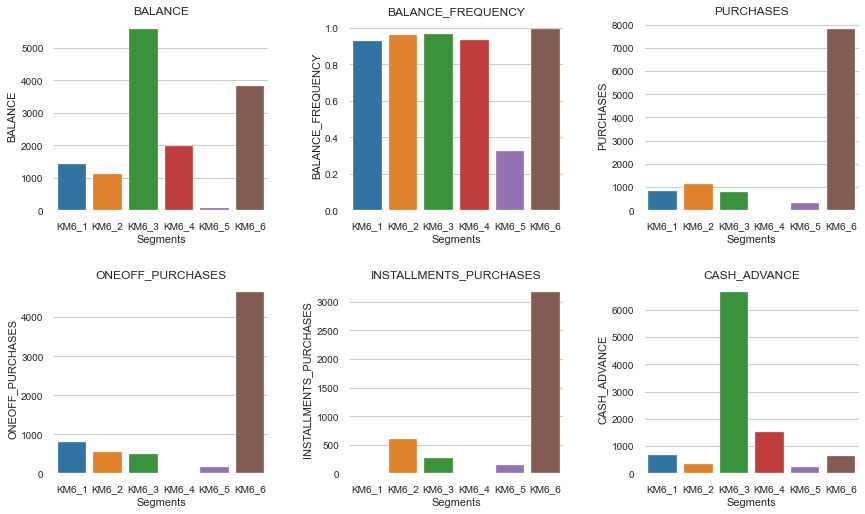

In [347]:
fig, axs = plt.subplots(2, 3, figsize = (13,8))
fig.tight_layout(pad=5.0)
k=0
for i in range(2):
    for j in range(3):
        sns.barplot(km6_series_list[k].index, km6_series_list[k].values,  orient='v' , ax=axs[i][j])
        axs[i][j].set_title(km6_series_list[k].name) 
        axs[i][j].set_ylabel(km6_series_list[k].name)
        axs[i][j].set_xlabel('Segments')
        k = k+1    
plt.show()

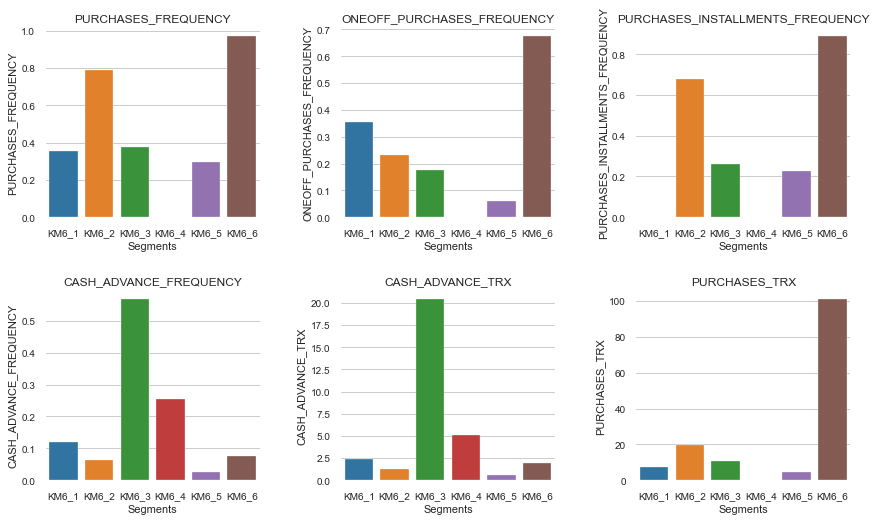

In [348]:
fig, axs = plt.subplots(2, 3, figsize = (13,8))
fig.tight_layout(pad=5.0)
for i in range(2):
    for j in range(3):
        sns.barplot(km6_series_list[k].index, km6_series_list[k].values,  orient='v' , ax=axs[i][j])
        axs[i][j].set_title(km6_series_list[k].name) 
        axs[i][j].set_ylabel(km6_series_list[k].name)
        axs[i][j].set_xlabel('Segments')
        k = k+1    
plt.show()

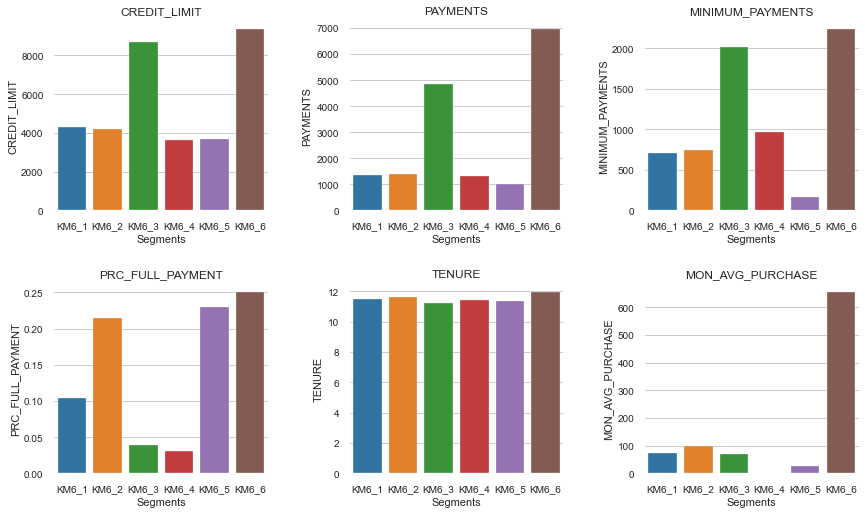

In [349]:
fig, axs = plt.subplots(2, 3, figsize = (13,8))
fig.tight_layout(pad=5.0)
for i in range(2):
    for j in range(3):
        sns.barplot(km6_series_list[k].index, km6_series_list[k].values,  orient='v' , ax=axs[i][j])
        axs[i][j].set_title(km6_series_list[k].name) 
        axs[i][j].set_ylabel(km6_series_list[k].name)
        axs[i][j].set_xlabel('Segments')
        k = k+1    
plt.show()

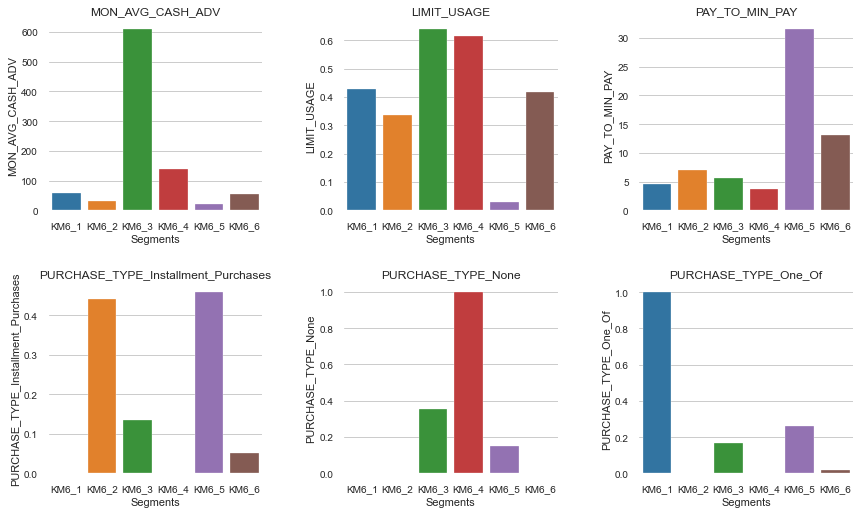

In [350]:
fig, axs = plt.subplots(2, 3, figsize = (13,8))
fig.tight_layout(pad=5.0)
for i in range(2):
    for j in range(3):
        sns.barplot(km6_series_list[k].index, km6_series_list[k].values,  orient='v' , ax=axs[i][j])
        axs[i][j].set_title(km6_series_list[k].name) 
        axs[i][j].set_ylabel(km6_series_list[k].name)
        axs[i][j].set_xlabel('Segments')
        k = k+1    
plt.show()

### Looking at the profiling data, we choose 6 segment solution over 5 segment, as it has greater differentiation. <br>
#### Also, one of the segments in 5 segment solution has much higher distribution of 48%.

## Key Observations:
##### Segment 1 has high balance and high advance but low payments and purchase frequency. Credit is under utilized.
##### Segment 2 is the largest group of customers with average credit limit but maximum purchase frequency and maximum instalment purchases. This group could be a target for credit limit increase.
##### Segment 3 is a small group of customers who use their cards primarily for cash advances but monthly purchase spent is also average.
##### Segment 4 only uses their cards for cash advances and have the lowest credit limit.
##### Segment 5 is a group of customers with lowest minimum payments with low credit limit, probably new customers.
##### Segment 6 is a small group of customer with highest average monthly purchase. Their payments are highest but they do not use their cards for cash advances.



### Save Model for furture predicting

In [351]:
### Saving model as pickle object pickle object

import pickle

with open('Kmeans.pkl', 'wb') as f:
    pickle.dump(km_6, f)